# Regression Modeling in Practice

## Week 1

In [2]:
import pandas as pd
import numpy

file=pd.read_csv('Alcohol.csv', sep=r'\s*,\s*',header=0, encoding='ascii', engine='python')

In [3]:
#S2AQ21A HOW OFTEN DRANK ANY ALCOHOL DURING PERIOD OF HEAVIEST DRINKING
#S1Q6A HIGHEST GRADE OR YEAR OF SCHOOL COMPLETED

#Select columns

df=file[['S2AQ21A','S1Q6A']]

In [4]:
#rename columns
df=df.rename(columns={'S2AQ21A':'alcoholic_score','S1Q6A':'school_level'})

In [5]:
#eliminate Nan Values and type modifications
import numpy as np
df.alcoholic_score= df.alcoholic_score.replace(r'^\s*$', np.nan, regex=True)
df.school_level= df.school_level.replace(r'^\s*$', np.nan, regex=True)
df = df[df['alcoholic_score'].notna()]
df = df[df['school_level'].notna()]
df['alcoholic_score']=df['alcoholic_score'].astype(int)

In [6]:
alcolist=df[df['alcoholic_score']<4].count()
print('total number of alcolist')
print(alcolist[0])


total number of alcolist
10302


In [7]:
#percentage of alcolist with lower school instruction
a=df[(df['alcoholic_score']<4)&(df['school_level']<8)].count()
#percentage of alcolist with medium school instruction
b=df[(df['alcoholic_score']<4)&(df['school_level']>7)&(df['school_level']<12)].count()
#percentage of alcolist with upper school instruction
c=df[(df['alcoholic_score']<4)&(df['school_level']>11)].count()

print('percentage of each group')
print((a[0],b[0],c[0])/alcolist[0])

percentage of each group
[0.13754611 0.58930305 0.27315084]


## Week 2

In [42]:
#import libraries
import statsmodels.api
import statsmodels.formula.api as smf
import seaborn
import matplotlib.pyplot as plt


In [43]:
# S3AQ3C1 USUAL QUANTITY WHEN SMOKED CIGARETTES
#S2AQ8B NUMBER OF DRINKS OF ANY ALCOHOL USUALLY CONSUMED ON DAYS WHEN DRANK ALCOHOL IN LAST 12 MONTHS
df=file[['S3AQ3C1','S2AQ8B']]
#rename columns
df=df.rename(columns={'S3AQ3C1':'cigarettes','S2AQ8B':'drinks'})

In [45]:
#eliminate Nan Values and type modifications

df.cigarettes= df.cigarettes.replace(r'^\s*$', np.nan, regex=True)
df.drinks= df.drinks.replace(r'^\s*$', np.nan, regex=True)
df = df[df['cigarettes'].notna()]
df = df[df['drinks'].notna()]
df['cigarettes']=df['cigarettes'].astype(int)
df['drinks']=df['drinks'].astype(int)
#eliminate unknown rows
df.drop(df.index[(df["cigarettes"] == 99)|(df["drinks"] == 99)],axis=0,inplace=True)


In [51]:
#subtract the mean from the response variable
mean=df['cigarettes'].mean()
df['cigarettes']=df['cigarettes']-mean


AxesSubplot(0.125,0.125;0.775x0.755)


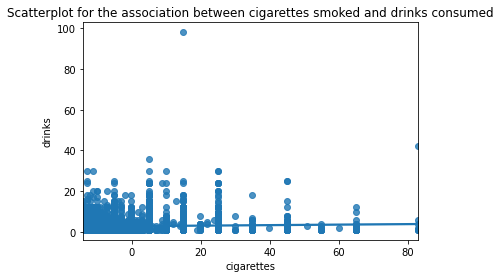

In [52]:
#Basic linear regression
scat=seaborn.regplot(x="cigarettes",y="drinks",data=df,scatter=True)
plt.title('Scatterplot for the association between cigarettes smoked and drinks consumed')
print(scat)

In [54]:
#outlier
c=df[df['drinks']>90]
c

,cigarettes,drinks
11822,14.963965,98


In [55]:
print('OLS regression model for the association between smoking and drinking')
reg=smf.ols('drinks~cigarettes',data=df).fit()
print(reg.summary())
print()
print()
print('the mean is:',df['cigarettes'].mean() ,'almost 0')

OLS regression model for the association between smoking and drinking
                            OLS Regression Results                            
Dep. Variable:                 drinks   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     36.86
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           1.30e-09
Time:                        11:39:19   Log-Likelihood:                -30831.
No. Observations:               12682   AIC:                         6.167e+04
Df Residuals:                   12680   BIC:                         6.168e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------